![example](images/director_shot.jpeg)

# Microsoft Movie Studio - Analysis

**Authors:** Ashley Eakland
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.
Microsoft is considering opening a movie studio and wants to make an informed decision about how to best ensure profitability. 

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

For this analysis, I am utilizing datasets from IMDB and Box Office Mojo so that I may analyze to provide insight to Microsoft as they navigate entry into the movie industry. These datasets represent film statistics and performance both with international and domestic releases, spanning many genres and runtime lengths going back to 2010 and all the way up to films yet to be released. Variables include movie titles, ratings, runtimes, genres, and gross profit. Target variable is going to be profit as the main goal behind any business venture is going to be profitability. 

For the purpose of this analysis, I will eliminate the movies not yet released as they will not serve in the analysis of profitability. I will look at correlations between ratings, runtimes, genres, and gross profit to see where funds are likely to be best allocated.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [2]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
!pwd

/Users/aeakland/Desktop/dsc-project-microsoft-analysis-phase1project


In [4]:
# Here you run your code to explore the data
titles_df = pd.read_csv("data/zippedData/imdb.title.basics.csv.gz")
titles_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [5]:
titles_df.info()
#missing values in original_title - maybe titles remained same from original title? Not an important variable.
#missing lots of movie length values... Will need to determine how to handle this missing data. Mean or median
#fill? With this amount of missing data, drop inappropriate.
#missing 5408 in genre as well. Equates to 3.7% missing values - drop values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [6]:
titles_df.genres.isna().sum()

5408

In [7]:
ratings_df = pd.read_csv("data/zippedData/imdb.title.ratings.csv.gz")
ratings_df.sort_values(['tconst'])

,tconst,averagerating,numvotes
36049,tt0063540,7.0,77
725,tt0066787,7.2,43
18429,tt0069049,6.9,4517
2223,tt0069204,6.1,13
1143,tt0100275,6.5,119
...,...,...,...
40537,tt9913084,6.2,6
62125,tt9914286,8.7,136
71368,tt9914642,8.5,8
52438,tt9914942,6.6,5


In [8]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [9]:
gross_profit_df = pd.read_csv("data/zippedData/bom.movie_gross.csv.gz")
gross_profit_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [10]:
gross_profit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


## Data Preparation

Describe and justify the process for preparing the data for analysis.

Upon a cursory review of the data, we see that there are missing values in the genre, runtime, and original_title columns in the Titles dataframe. The ratings dataframe is complete. The gross profit dataframe is also missing values in both the domestic and gross profit columns. To first identify what columns and values can be dropped, I will need to combine my dataframes for analysis with profit, as profit is my target variable.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [11]:
# Here you run your code to clean the data
#dropping original title column as I don't feel it is relevant. Renaming the primary title to just Title. Merged
#with ratings df so I have my ratings and my titles together. 
rated_titles_df = titles_df.copy()
rated_titles_df.rename(columns = {'primary_title': 'title'}, inplace = True)
rated_titles_df.drop(columns=['original_title'], inplace = True)
rated_titles_df = rated_titles_df.merge(ratings_df, on='tconst')
rated_titles_df

,tconst,title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


In [12]:
rated_titles_df.info()
#null values appear in runtime inutes and genres.
#average runtime is 94.654 minutes compared to median runtime of 91 minutes and mode of 90 minutes. Given that the 
#missing values are over 10% of the total values, I will need to fill the null with either mean or median, 
#or drop to analyze. Drop is not an appropriate option for this. I will fill null values with median runtime for
#analysis.
#genre missing values make up 1% of the values below. Safe to drop those.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   title            73856 non-null  object 
 2   start_year       73856 non-null  int64  
 3   runtime_minutes  66236 non-null  float64
 4   genres           73052 non-null  object 
 5   averagerating    73856 non-null  float64
 6   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 4.5+ MB


In [13]:
rated_titles_df.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,66236.000000,73856.000000,7.385600e+04
mean,2014.276132,94.654040,6.332729,3.523662e+03
std,2.614807,208.574111,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,4.900000e+01
75%,2016.000000,104.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [14]:
rated_titles_df['runtime_minutes'].mode()

0    90.0
dtype: float64

In [15]:
rated_titles_df.isna().sum()

tconst                0
title                 0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [16]:
missing_runtime_perc = float(7620/73856) *100
missing_genre_perc = float(804/73856)*100
print(f' Missing runtime percentage is {missing_runtime_perc}')
print(f' Missing genre percentage is {missing_genre_perc}')

 Missing runtime percentage is 10.317374350086656
 Missing genre percentage is 1.0886048526863086


In [17]:
rated_titles_df['runtime_minutes'].fillna(value=91, inplace=True)
rated_titles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   title            73856 non-null  object 
 2   start_year       73856 non-null  int64  
 3   runtime_minutes  73856 non-null  float64
 4   genres           73052 non-null  object 
 5   averagerating    73856 non-null  float64
 6   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 4.5+ MB


In [18]:
rated_titles_df.dropna(subset=['genres'], inplace= True)
rated_titles_df.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73052.000000,73052.000000,73052.000000,7.305200e+04
mean,2014.281430,94.357677,6.330930,3.562173e+03
std,2.615288,198.595006,1.474699,3.045804e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,83.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,5.000000e+01
75%,2017.000000,102.000000,7.400000,2.890000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [19]:
rated_titles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73052 entries, 0 to 73855
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73052 non-null  object 
 1   title            73052 non-null  object 
 2   start_year       73052 non-null  int64  
 3   runtime_minutes  73052 non-null  float64
 4   genres           73052 non-null  object 
 5   averagerating    73052 non-null  float64
 6   numvotes         73052 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 4.5+ MB


In [36]:
rated_titles_df['genres'].unique()
rated_titles_df[['genre_1','genre_2', 'genre_3']] = rated_titles_df['genres'].str.split(',', expand=True)
rated_titles_df

,tconst,title,start_year,runtime_minutes,genres,averagerating,numvotes,genre_1,genre_2,genre_3
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Action,Crime,Drama
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43,Biography,Drama,None
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,Drama,None,None
3,tt0069204,Sabse Bada Sukh,2018,91.0,"Comedy,Drama",6.1,13,Comedy,Drama,None
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,Comedy,Drama,Fantasy
...,...,...,...,...,...,...,...,...,...,...
73850,tt9913056,Swarm Season,2019,86.0,Documentary,6.2,5,Documentary,None,None
73851,tt9913084,Diabolik sono io,2019,75.0,Documentary,6.2,6,Documentary,None,None
73852,tt9914286,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136,Drama,Family,None
73853,tt9914642,Albatross,2017,91.0,Documentary,8.5,8,Documentary,None,None


In [95]:
rated_genre_df = rated_genre_df.drop(columns=['genres','start_year'])
rated_genre_df

,tconst,title,runtime_minutes,averagerating,numvotes,genre_1,genre_2,genre_3
0,tt0063540,Sunghursh,175.0,7.0,77,Action,Crime,Drama
1,tt0066787,One Day Before the Rainy Season,114.0,7.2,43,Biography,Drama,None
2,tt0069049,The Other Side of the Wind,122.0,6.9,4517,Drama,None,None
3,tt0069204,Sabse Bada Sukh,91.0,6.1,13,Comedy,Drama,None
4,tt0100275,The Wandering Soap Opera,80.0,6.5,119,Comedy,Drama,Fantasy
...,...,...,...,...,...,...,...,...
73850,tt9913056,Swarm Season,86.0,6.2,5,Documentary,None,None
73851,tt9913084,Diabolik sono io,75.0,6.2,6,Documentary,None,None
73852,tt9914286,Sokagin Çocuklari,98.0,8.7,136,Drama,Family,None
73853,tt9914642,Albatross,91.0,8.5,8,Documentary,None,None


In [118]:
rated_genre_df

,tconst,title,runtime_minutes,averagerating,numvotes,genre_1,genre_2,genre_3
0,tt0063540,Sunghursh,175.0,7.0,77,Action,Crime,Drama
1,tt0066787,One Day Before the Rainy Season,114.0,7.2,43,Biography,Drama,None
2,tt0069049,The Other Side of the Wind,122.0,6.9,4517,Drama,None,None
3,tt0069204,Sabse Bada Sukh,91.0,6.1,13,Comedy,Drama,None
4,tt0100275,The Wandering Soap Opera,80.0,6.5,119,Comedy,Drama,Fantasy
...,...,...,...,...,...,...,...,...
73850,tt9913056,Swarm Season,86.0,6.2,5,Documentary,None,None
73851,tt9913084,Diabolik sono io,75.0,6.2,6,Documentary,None,None
73852,tt9914286,Sokagin Çocuklari,98.0,8.7,136,Drama,Family,None
73853,tt9914642,Albatross,91.0,8.5,8,Documentary,None,None


In [32]:
profit_df = rated_titles_df.copy()
profit_df[profit_df['title'] == 'On the Road']

,tconst,title,start_year,runtime_minutes,genres,averagerating,numvotes
41,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886
45101,tt4339118,On the Road,2014,89.0,Drama,6.0,6
55547,tt5647250,On the Road,2016,121.0,Drama,5.7,127


In [35]:
profit_by_title_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3020 entries, 0 to 3019
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           3020 non-null   object 
 1   title            3020 non-null   object 
 2   start_year       3020 non-null   int64  
 3   runtime_minutes  3020 non-null   float64
 4   genres           3020 non-null   object 
 5   averagerating    3020 non-null   float64
 6   numvotes         3020 non-null   int64  
 7   studio           3017 non-null   object 
 8   domestic_gross   2998 non-null   float64
 9   foreign_gross    1825 non-null   object 
 10  year             3020 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 283.1+ KB


In [34]:
profit_by_title_df = profit_df.merge(gross_profit_df, on='title')
profit_by_title_df
#what is On The Road and why does it have duplicate values spanning multiple years with varying run times? initial
#DF shows 6 different years and runtimes. 
#what is the significance of the tconst column?
#missing values on domestic_gross and foreign_gross, as well as studio. I'm not analyzing studio, perse, so I'm
#less concerned with those missing values. Profit missing values are going to be important. I will have to break
# the foreign films into their own dataframe. 

,tconst,title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013
...,...,...,...,...,...,...,...,...,...,...,...
3015,tt8331988,The Chambermaid,2018,102.0,Drama,7.1,147,FM,300.0,NaN,2015
3016,tt8404272,How Long Will I Love U,2018,101.0,Romance,6.5,607,WGUSA,747000.0,82100000,2018
3017,tt8427036,Helicopter Eela,2018,135.0,Drama,5.4,673,Eros,72000.0,NaN,2018
3018,tt9078374,Last Letter,2018,114.0,"Drama,Romance",6.4,322,CL,181000.0,NaN,2018


In [36]:
profit_by_title_df.describe().round()

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,year
count,3020.0,3020.0,3020.0,3020.0,2998.0,3020.0
mean,2014.0,107.0,6.0,61843.0,30594259.0,2014.0
std,2.0,20.0,1.0,125623.0,66767430.0,2.0
min,2010.0,3.0,2.0,5.0,100.0,2010.0
25%,2012.0,93.0,6.0,2199.0,138000.0,2012.0
50%,2014.0,104.0,7.0,13249.0,2000000.0,2014.0
75%,2016.0,118.0,7.0,63191.0,32400000.0,2016.0
max,2019.0,272.0,9.0,1841066.0,700100000.0,2018.0


In [137]:
profit_by_title_df['domestic_gross'].mode()

0    1300000.0
dtype: float64

In [37]:
profit_by_title_df['domestic_gross'].mean()

30594258.5993996

In [38]:
#less than 1% of missing values in domestic gross column. Mode is far off the mark as far
#as filling missing values goes. Mean is $30,594,258, median is $20,000,000.
(profit_by_title_df['domestic_gross'].isna().sum() / 3020) *100

0.728476821192053

In [49]:
profit_by_title_df['foreign_gross'] = pd.to_numeric(profit_by_title_df['foreign_gross'], errors='coerce')
profit_by_title_df

,tconst,title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
1,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000.0,2012
2,tt4339118,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000.0,2012
3,tt5647250,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000.0,2012
4,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000.0,2013
5,tt0365907,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,26900000.0,2014
...,...,...,...,...,...,...,...,...,...,...,...
3001,tt7752454,Detective Chinatown 2,2018,121.0,"Action,Comedy,Mystery",6.1,1250,WB,2000000.0,542100000.0,2018
3003,tt7784604,Hereditary,2018,127.0,"Drama,Horror,Mystery",7.3,151571,A24,44100000.0,35300000.0,2018
3010,tt8097306,Nobody's Fool,2018,110.0,"Comedy,Drama,Romance",4.6,3618,Par.,31700000.0,1800000.0,2018
3016,tt8404272,How Long Will I Love U,2018,101.0,Romance,6.5,607,WGUSA,747000.0,82100000.0,2018


In [52]:
#dropping foreign profits from this DF. 
domestic_profit_title_df = profit_by_title_df.copy()
domestic_profit_title_df.drop(columns=['foreign_gross'], inplace=True)
domestic_profit_title_df

,tconst,title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,year
1,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,2012
2,tt4339118,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,2012
3,tt5647250,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,2012
4,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,2013
5,tt0365907,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,2014
...,...,...,...,...,...,...,...,...,...,...
3001,tt7752454,Detective Chinatown 2,2018,121.0,"Action,Comedy,Mystery",6.1,1250,WB,2000000.0,2018
3003,tt7784604,Hereditary,2018,127.0,"Drama,Horror,Mystery",7.3,151571,A24,44100000.0,2018
3010,tt8097306,Nobody's Fool,2018,110.0,"Comedy,Drama,Romance",4.6,3618,Par.,31700000.0,2018
3016,tt8404272,How Long Will I Love U,2018,101.0,Romance,6.5,607,WGUSA,747000.0,2018


In [47]:
#copy of DF to analyze foreign films separately
foreign_films_df = profit_by_title_df.copy()
foreign_films_df.dropna(subset=['foreign_gross'], inplace=True)
foreign_films_df.describe().round()

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year
count,1821.0,1821.0,1821.0,1821.0,1799.0,1821.0,1821.0
mean,2014.0,107.0,6.0,93223.0,48768288.0,78471867.0,2014.0
std,3.0,20.0,1.0,151413.0,77453701.0,138899634.0,3.0
min,2010.0,3.0,2.0,5.0,400.0,600.0,2010.0
25%,2011.0,94.0,6.0,5241.0,1300000.0,4700000.0,2011.0
50%,2013.0,105.0,6.0,36867.0,20700000.0,21200000.0,2014.0
75%,2016.0,118.0,7.0,111602.0,60900000.0,81700000.0,2016.0
max,2019.0,272.0,9.0,1841066.0,700100000.0,946400000.0,2018.0


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

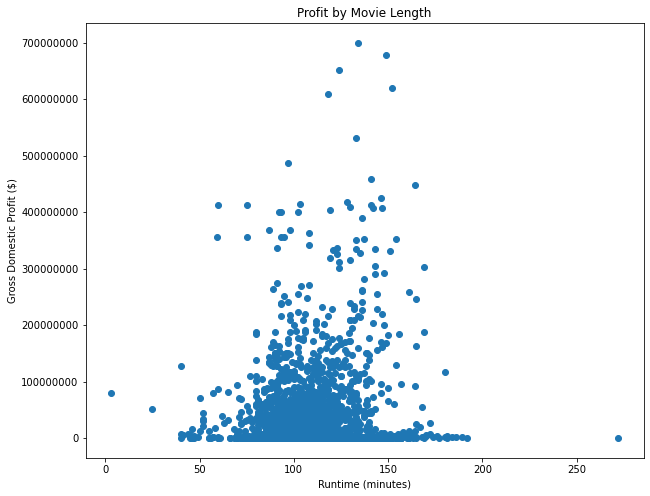

In [115]:
# Here you run your code to model the data
#correlation between runtime and profit?
x = profit_by_title_df['runtime_minutes']
y = (profit_by_title_df.domestic_gross.round()) 
fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(x,y)
ax.set_title("Profit by Movie Length")
ax.set_xlabel("Runtime (minutes)")
ax.set_ylabel("Gross Domestic Profit ($)")
ax.ticklabel_format(axis = 'y', style='plain');

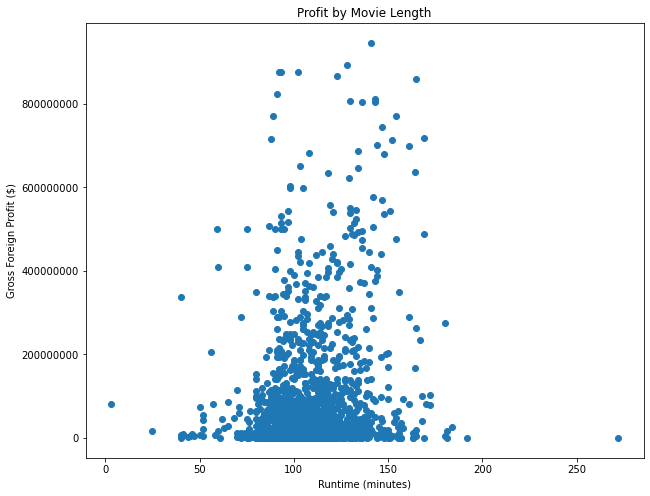

In [123]:
x = profit_by_title_df['runtime_minutes']
y = (profit_by_title_df.foreign_gross.round()) 
fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(x,y)
ax.set_title("Profit by Movie Length")
ax.set_xlabel("Runtime (minutes)")
ax.set_ylabel("Gross Foreign Profit ($)")
ax.ticklabel_format(axis = 'y', style='plain')

In [130]:
profit_by_title_df['genres'].value_counts()

Drama                       317
Comedy,Drama                133
Comedy,Drama,Romance        132
Drama,Romance               112
Documentary                 110
                           ... 
Action,Fantasy,Romance        1
Comedy,Crime,Horror           1
Action,Drama,Western          1
Crime,Mystery                 1
Action,Adventure,Mystery      1
Name: genres, Length: 322, dtype: int64

ValueError: x and y must be the same size

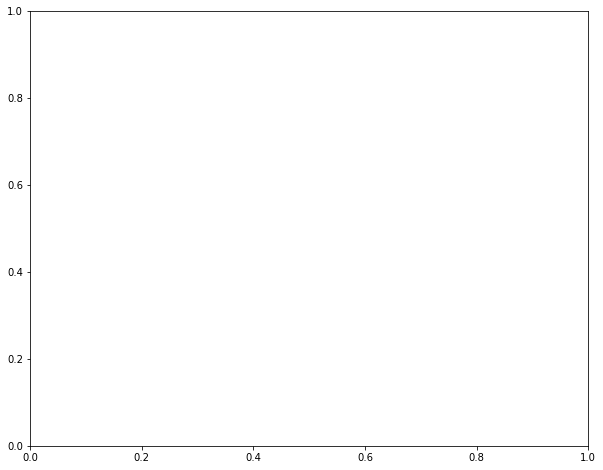

In [124]:
x = profit_by_title_df['genres'].value_counts()
y = (profit_by_title_df.domestic_gross.round()) 
fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(x,y)
ax.set_title("Profit by Movie Genres")
ax.set_xlabel("Genres")
ax.set_ylabel("Gross Domestic Profit ($)")
ax.ticklabel_format(axis = 'y', style='plain')

                 start_year  runtime_minutes  averagerating  numvotes  \
start_year         1.000000         0.077649      -0.004315 -0.078421   
runtime_minutes    0.077649         1.000000       0.150527  0.264051   
averagerating     -0.004315         0.150527       1.000000  0.278443   
numvotes          -0.078421         0.264051       0.278443  1.000000   
domestic_gross     0.037081         0.127448       0.119377  0.665179   
foreign_gross      0.121540         0.196463       0.152904  0.560130   
year               0.811323         0.033095       0.040425 -0.122952   

                 domestic_gross  foreign_gross      year  
start_year             0.037081       0.121540  0.811323  
runtime_minutes        0.127448       0.196463  0.033095  
averagerating          0.119377       0.152904  0.040425  
numvotes               0.665179       0.560130 -0.122952  
domestic_gross         1.000000       0.827783  0.009248  
foreign_gross          0.827783       1.000000  0.130427  
ye

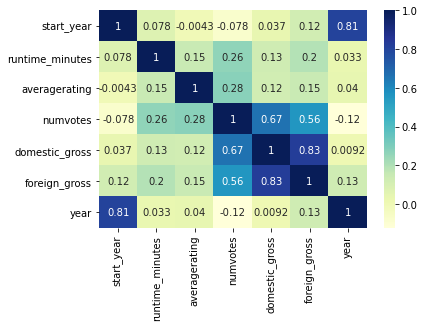

In [122]:
print(profit_by_title_df.corr())

heatmap = sns.heatmap(profit_by_title_df.corr(), cmap="YlGnBu", annot=True)


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***